**Assignment – Model Selection**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading the data
dt=pd.read_csv("/content/titanic_dataset .csv")

In [5]:
#Viewing the first 5 observations of the data
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Number of Rows and Columns
dt.shape

(891, 12)

There are 891 rows or observations and 12 columns or features

In [7]:
#Getting More info about the dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Out of the total 12 features two are float, five are integers and five are object.

In [8]:
#Number of unique observations in Ticket
dt["Ticket"].nunique()

681

In [9]:
#Number of unique observations in Cabin
dt['Cabin'].nunique()

147

In [10]:
#Droping Unnecessary columns
dt.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

In [11]:
#Checking Null values
dt.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

There are missing values in Age, Cabin and Embarked

<Axes: >

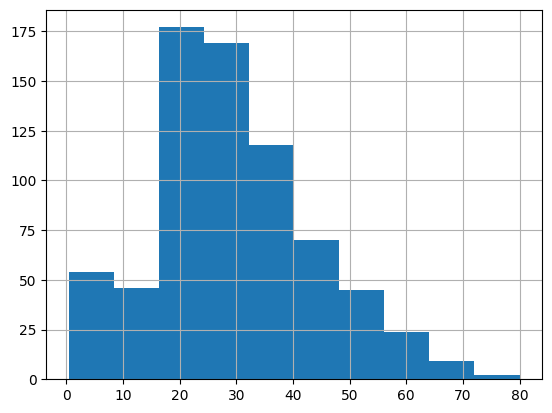

In [12]:
#Plotting the histogram of Age
dt['Age'].hist()

In [13]:
#Checking the skewness of Age
dt['Age'].skew()

0.38910778230082704

In [14]:
#Filling Null Values of Age with mean
dt["Age"].fillna(dt['Age'].mean(),inplace=True)

In [15]:
#Finding the number of observation for each category of Embarked
dt['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
#Filling Null value in Embarked
dt['Embarked'].fillna(value="S",inplace=True)

In [17]:
#Checking Null value
dt.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
dt['Sex']=le.fit_transform(dt['Sex'])

In [20]:
dt['Embarked']=le.fit_transform(dt['Embarked'])

In [21]:
dt.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


<Axes: ylabel='Fare'>

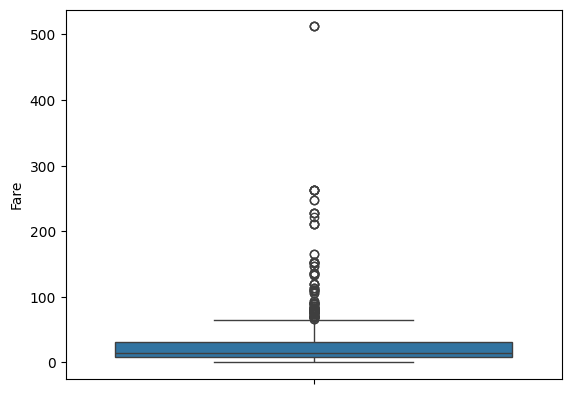

In [22]:
sns.boxplot(dt['Fare'])

In [23]:
Q3=np.percentile(dt['Fare'],75,method='midpoint')
Q1=np.percentile(dt['Fare'],25,method='midpoint')
print(Q3)

31.0


In [24]:
IQR=Q3-Q1

In [25]:
upper_limi=Q3+1.5*IQR

In [26]:
outlier=[]

for x in dt['Fare']:
  if ( (x>upper_limi)):
    outlier.append(x)

print(outlier)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [27]:
len(outlier)

116

In [28]:
dt=dt[dt['Fare']<upper_limi]

In [29]:
dt.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
5,0,3,1,29.699118,0,0,8.4583,1


<Axes: ylabel='Age'>

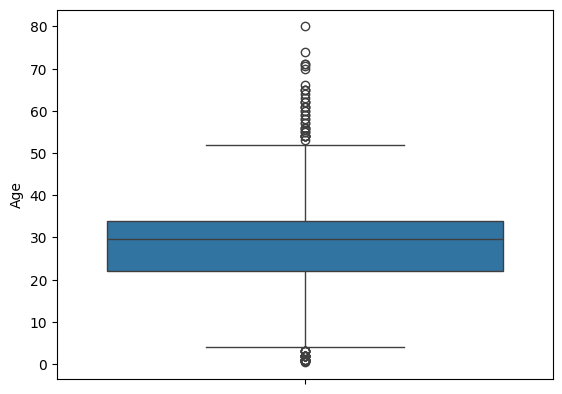

In [30]:
sns.boxplot(dt['Age'])

In [31]:
Q3=np.percentile(dt['Age'],75,method='midpoint')
Q1=np.percentile(dt['Age'],25,method='midpoint')

In [32]:
IQR=Q3-Q1

In [33]:
upper_limi=Q3+1.5*IQR
low_limi=Q1-1.5*IQR

In [34]:
outlier=[]

for x in dt['Age']:
  if ((x<low_limi) or  (x>upper_limi)):
    outlier.append(x)

print(outlier)

[54.0, 2.0, 58.0, 55.0, 2.0, 66.0, 3.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 3.0, 2.0, 59.0, 54.0, 62.0, 3.0, 65.0, 54.0, 61.0, 2.0, 3.0, 3.0, 1.0, 1.0, 3.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 54.0, 2.0, 64.0, 62.0, 62.0, 53.0, 54.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 70.0, 60.0, 60.0, 0.67, 57.0, 54.0, 1.0, 0.42, 2.0, 1.0, 0.83, 74.0]


In [35]:
len(outlier)

67

In [36]:
dt=dt[(dt["Age"]>low_limi) ]

In [37]:
dt=dt[(dt["Age"]<upper_limi)]

In [38]:
dt.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
5,0,3,1,29.699118,0,0,8.4583,1


In [39]:
dt.shape

(696, 8)

# Create kNN and SVM models

In [40]:
x=dt.drop("Survived",axis=1)

In [41]:
y=dt['Survived']

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=dt["Survived"],random_state=42,test_size=0.2)

#KNN

In [43]:
#Finding Optimal number of neighbours
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(5,10)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
#Creating a loop to find accuracy of each number of neighbours
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric="minkowski",p=2)
  classifier.fit(x_train,y_train)
  knn_pred=classifier.predict(x_test)
  accuracy=accuracy_score(y_test,knn_pred)
  metric_k.append(accuracy)

Text(0, 0.5, 'Metric k')

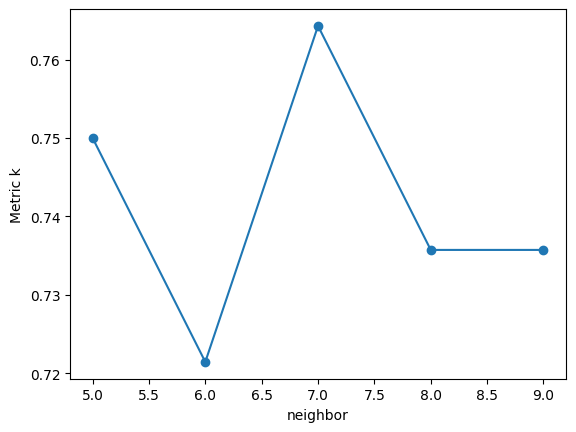

In [46]:
plt.plot(neighbors,metric_k,"o-")
plt.xlabel("neighbor")
plt.ylabel("Metric k")

From the above diagram Metric k or accuracy value is high for neighbour 7 which is the value we consider as the number of neighbours in further analysis for KNN

In [47]:
classifier=KNeighborsClassifier(n_neighbors=7,metric="minkowski",p=2)
classifier.fit(x_train,y_train)
knn_pred=classifier.predict(x_test)

In [48]:
knn_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0])

In [49]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score,f1_score

In [50]:
confusion_matrix(y_test,knn_pred)

array([[78, 16],
       [17, 29]])

In [51]:
print("Accuracy:" , accuracy_score(y_test,knn_pred))
print("Precision:",precision_score(y_test,knn_pred))
print("recall:",recall_score(y_test,knn_pred))
print("F1",f1_score(y_test,knn_pred))

Accuracy: 0.7642857142857142
Precision: 0.6444444444444445
recall: 0.6304347826086957
F1 0.6373626373626373


#Support Vector Machine

In [52]:
from sklearn.svm import SVC

In [53]:
parameters = {
    'C': [0.1, 0.5],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4]
}

In [54]:
from sklearn.model_selection import GridSearchCV
classi=SVC()
gcv=GridSearchCV(estimator=classi,param_grid=parameters)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.5], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [55]:
dt_clf=gcv.best_estimator_
dt_clf.fit(x_train,y_train)

SVC(C=0.1, degree=2, kernel='linear')

In [56]:
confusion_matrix(y_test,dt_clf.predict(x_test))

array([[77, 17],
       [17, 29]])

In [57]:
print("Accuracy:" , accuracy_score(y_test,dt_clf.predict(x_test)))
print("Precision:",precision_score(y_test,dt_clf.predict(x_test)))
print("recall:",recall_score(y_test,dt_clf.predict(x_test)))
print("F1",f1_score(y_test,dt_clf.predict(x_test)))

Accuracy: 0.7571428571428571
Precision: 0.6304347826086957
recall: 0.6304347826086957
F1 0.6304347826086957


#K-fold and Stratified k-fold cross validation techniques

In [58]:
from sklearn.model_selection import KFold
kfoldvalidator=KFold(10)

In [60]:
for train_index,test_index in kfoldvalidator.split(x,y):
  print("Training index:",train_index)
  print("Test index:",test_index)

Training index: [ 70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 31

**K Fold for KNN**

In [61]:
from sklearn.model_selection import cross_val_score
cv_result_knn=cross_val_score(classifier,x,y,cv=kfoldvalidator)

In [62]:
cv_result_knn

array([0.64285714, 0.7       , 0.67142857, 0.64285714, 0.65714286,
       0.78571429, 0.76811594, 0.72463768, 0.76811594, 0.7826087 ])

In [63]:
cv_result_knn.mean()

0.7143478260869565

**K Fold for SVM**

In [64]:
cv_result_svm=cross_val_score(dt_clf,x,y,cv=kfoldvalidator)

In [65]:
cv_result_svm

array([0.77142857, 0.8       , 0.77142857, 0.81428571, 0.77142857,
       0.8       , 0.72463768, 0.75362319, 0.84057971, 0.8115942 ])

In [66]:
cv_result_svm.mean()

0.7859006211180125

**Stratified k fold for KNN**

In [67]:
from sklearn.model_selection import StratifiedKFold
strat_validator=StratifiedKFold(n_splits=10)

In [68]:
for train_index,test_index in strat_validator.split(x,y):
  print("Training index:",train_index)
  print("Test index:",test_index)

Training index: [ 56  60  62  63  65  66  75  76  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 31

In [74]:
str_cv_result_knn=cross_val_score(classifier,x,y,cv=strat_validator)

In [75]:
str_cv_result_knn

array([0.65714286, 0.67142857, 0.67142857, 0.67142857, 0.72857143,
       0.68571429, 0.75362319, 0.8115942 , 0.75362319, 0.75362319])

In [76]:
str_cv_result_knn.mean()

0.7158178053830226

**Stratified K fold for SVM**

In [83]:
str_cv_result_SVM=cross_val_score(dt_clf,x,y,cv=strat_validator)

In [84]:
str_cv_result_SVM

array([0.8       , 0.75714286, 0.77142857, 0.82857143, 0.8       ,
       0.75714286, 0.76811594, 0.76811594, 0.8115942 , 0.79710145])

In [85]:
str_cv_result_SVM.mean()

0.7859213250517599

**K-Fold for KNN has mean accuracy 0.7143478260869565**

**K-Fold for SVM has mean accuracy 0.7859006211180125**

**Stratified K-Fold for KNN has mean accuracy 0.7158178053830226**

**Stratified K-Fold for SVM has mean accuracy 0.7859213250517599**